In [ ]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Cargar (importar) un dataset - Mercado Inmobiliario en California
california = fetch_california_housing(download_if_missing=True)
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Price
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25  3.422

[5 rows x 9 columns]


In [ ]:
# Escalar un DataFrame nuevo - IMPORTANTE: PCA es MUY SENSIBLE a la escala
df_escalado = StandardScaler().fit_transform(df)

print(df.head())
print(df.tail())

print(df_escalado)

   MedInc  HouseAge  AveRooms  AveBedrms  ...  AveOccup  Latitude  Longitude  Price
0  8.3252      41.0  6.984127   1.023810  ...  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880  ...  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446  ...  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059  ...  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081  ...  2.181467     37.85    -122.25  3.422

[5 rows x 9 columns]
       MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  Price
20635  1.5603      25.0  5.045455  ...     39.48    -121.09  0.781
20636  2.5568      18.0  6.114035  ...     39.49    -121.21  0.771
20637  1.7000      17.0  5.205543  ...     39.43    -121.22  0.923
20638  1.8672      18.0  5.329513  ...     39.43    -121.32  0.847
20639  2.3886      16.0  5.254717  ...     39.37    -121.24  0.894

[5 rows x 9 columns]
[[ 2.34476576  0.98214266  0.62855945 ...  1.05254

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_escalado)

print(X_pca)

# Explicacion de la varianza PCA
print(f"Varianza explicada por 2 componentes: {pca.explained_variance_ratio_.sum()*100:2f}")

[[ 2.34654276 -0.34644059]
 [ 1.76136708 -0.43812372]
 [ 2.33031157  0.12620806]
 ...
 [ 0.68738046  2.0567699 ]
 [ 0.82843475  2.07324029]
 [ 0.77143988  1.83274305]]
Varianza explicada por 2 componentes: 44.577054


In [ ]:
# Clustering sobre las variables elegidas por PCA (K=5, como lo hemos visto en el ejercicio anterior)
model = KMeans(n_clusters=5, random_state=42, n_init=10)

# Obtener los patrones de clustering
clusters = model.fit_predict(X_pca)

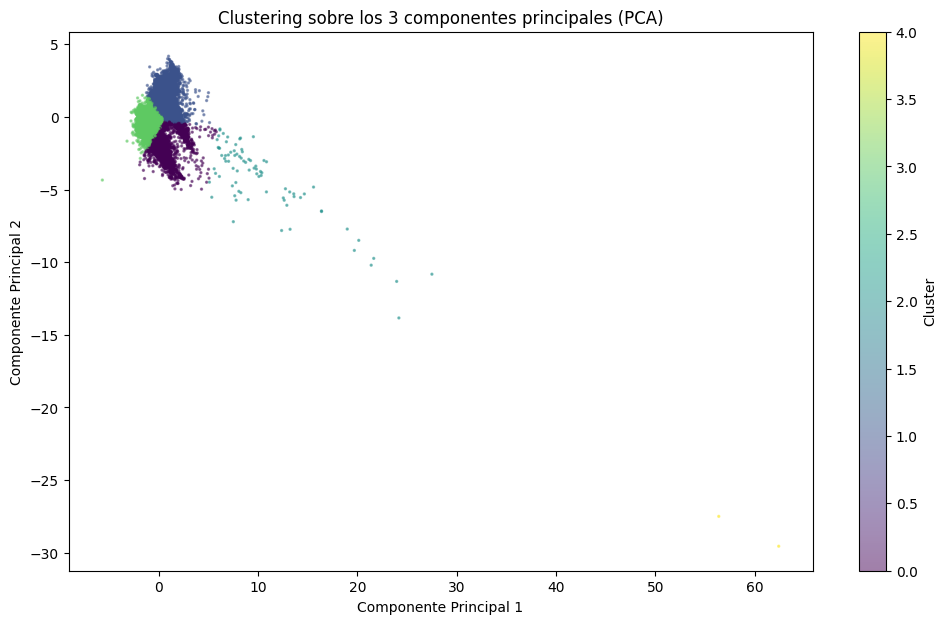

In [ ]:
# Visualizacion
plt.figure(figsize=(12, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", s=2, alpha=0.5)
plt.title("Clustering sobre los 3 componentes principales (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()